In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'Employees'

In [3]:
df = pd.read_csv('Employees.csv', sep = ';')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

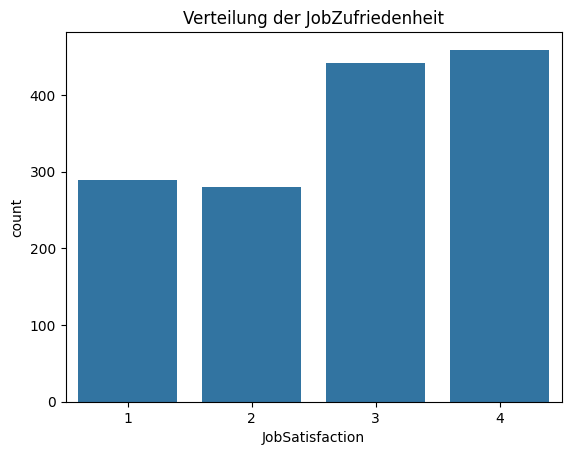

In [7]:
sns.countplot(x='JobSatisfaction', data=df)
plt.title('Verteilung der JobZufriedenheit')
plt.show()

# JobSatisfaction
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

<Figure size 1000x600 with 0 Axes>

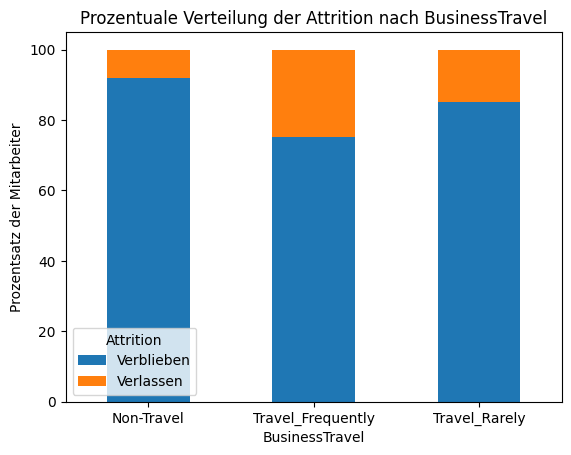

Hier wird gut repräsentiert, je mehr Reisebereitschaft, desto höher die Kündigungswahrscheinlichkeit


In [8]:
# Berechne die Anzahl der Kündigungen in jeder BusinessTravel-Kategorie
business_travel_counts = df.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)

# Berechne die prozentualen Werte
business_travel_percentage = business_travel_counts.div(business_travel_counts.sum(axis=1), axis=0) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
business_travel_percentage.plot(kind='bar', stacked=True)
plt.title('Prozentuale Verteilung der Attrition nach BusinessTravel')
plt.xlabel('BusinessTravel')
plt.ylabel('Prozentsatz der Mitarbeiter')
plt.legend(title='Attrition', labels=['Verblieben', 'Verlassen'])
plt.xticks(rotation=0)
plt.show()


print('Hier wird gut repräsentiert, je mehr Reisebereitschaft, desto höher die Kündigungswahrscheinlichkeit')

<Figure size 1000x600 with 0 Axes>

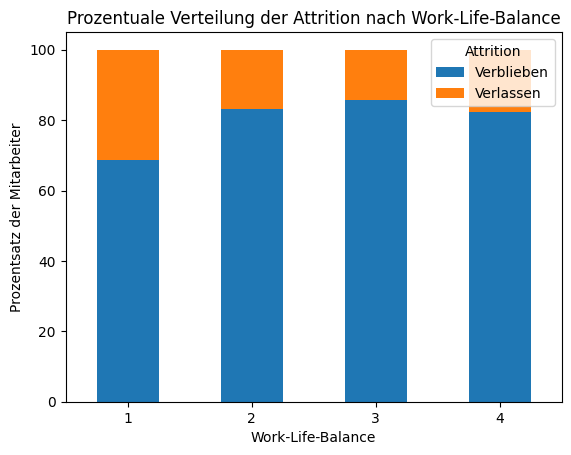

Da nicht bei WorkLifeBalance 4 die wenigsten das Unternehmen verlassen deutet das darauf hin, dass es noch andere Faktoren gibt die hier eine Rolle spielen


In [9]:
# Berechne die Anzahl der Kündigungen in jeder WorkLifeBalance-Kategorie
work_life_balance_counts = df.groupby(['WorkLifeBalance', 'Attrition']).size().unstack(fill_value=0)

# Berechne die prozentualen Werte
work_life_balance_percentage = work_life_balance_counts.div(work_life_balance_counts.sum(axis=1), axis=0) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
work_life_balance_percentage.plot(kind='bar', stacked=True)
plt.title('Prozentuale Verteilung der Attrition nach Work-Life-Balance')
plt.xlabel('Work-Life-Balance')
plt.ylabel('Prozentsatz der Mitarbeiter')
plt.legend(title='Attrition', labels=['Verblieben', 'Verlassen'])
plt.xticks(rotation=0)
plt.show()

print('Da nicht bei WorkLifeBalance 4 die wenigsten das Unternehmen verlassen deutet das darauf hin, dass es noch andere Faktoren gibt die hier eine Rolle spielen')

In [10]:
# Überprüfe die Gehaltsspanne
min_salary = df['MonthlyIncome'].min()
max_salary = df['MonthlyIncome'].max()
print(f"Min Salary: {min_salary}, Max Salary: {max_salary}")


Min Salary: 1009, Max Salary: 19999


In [11]:
# Definiere die Gruppen
bins = [0, 2000, 4000, 6000, 8000, 10000, max_salary]  # Passe die Werte entsprechend an
labels = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k-10k', '10k+']

# Teile die Gehälter in Gruppen auf
df['SalaryGroup'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels, right=False)

# Überprüfe die neuen Gruppen
print(df['SalaryGroup'].value_counts())


SalaryGroup
2k-4k     509
4k-6k     372
10k+      280
6k-8k     175
8k-10k    100
0-2k       33
Name: count, dtype: int64


C:\Users\YoussefAbbou\AppData\Local\Temp\ipykernel_21132\479712594.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_group_counts = df.groupby(['SalaryGroup', 'Attrition']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

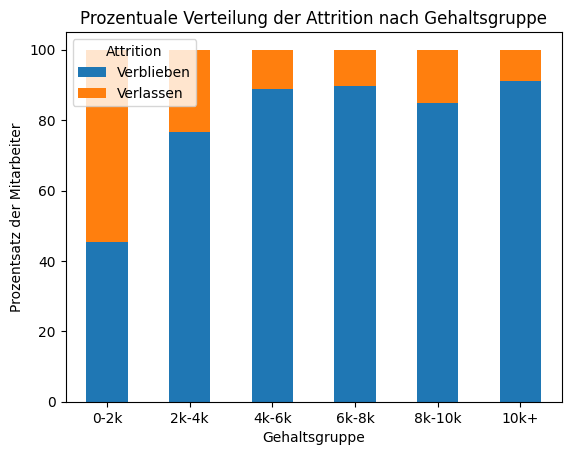

In [12]:
# Berechne die Anzahl der Kündigungen in jeder Gehaltsgruppe
salary_group_counts = df.groupby(['SalaryGroup', 'Attrition']).size().unstack(fill_value=0)

# Berechne die prozentualen Werte
salary_group_percentage = salary_group_counts.div(salary_group_counts.sum(axis=1), axis=0) * 100

# Visualisierung
plt.figure(figsize=(10, 6))
salary_group_percentage.plot(kind='bar', stacked=True)
plt.title('Prozentuale Verteilung der Attrition nach Gehaltsgruppe')
plt.xlabel('Gehaltsgruppe')
plt.ylabel('Prozentsatz der Mitarbeiter')
plt.legend(title='Attrition', labels=['Verblieben', 'Verlassen'])
plt.xticks(rotation=0)
plt.show()




C:\Users\YoussefAbbou\AppData\Local\Temp\ipykernel_21132\4032539312.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['SalaryGroup', 'WorkLifeBalance'])['JobSatisfaction'].mean().unstack()


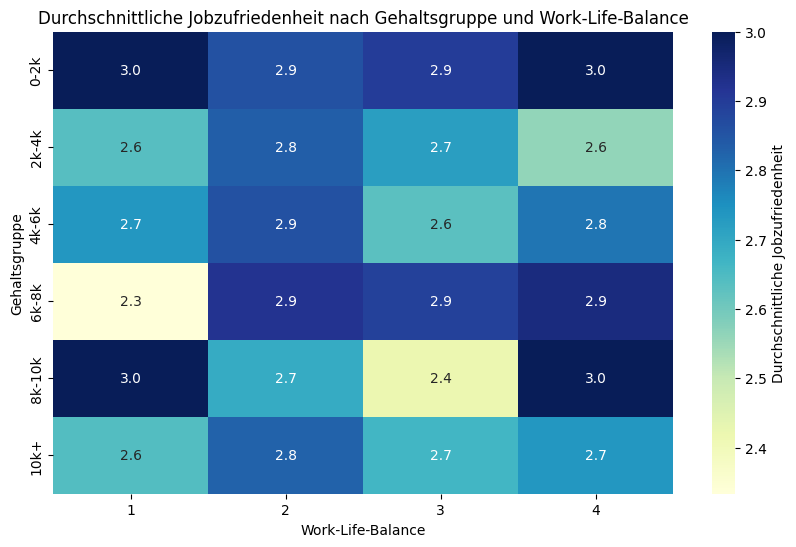

In [13]:

# Gruppiere die Daten nach SalaryGroup und WorkLifeBalance und berechne den Durchschnitt der Jobzufriedenheit
heatmap_data = df.groupby(['SalaryGroup', 'WorkLifeBalance'])['JobSatisfaction'].mean().unstack()

# Erstelle die Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Durchschnittliche Jobzufriedenheit'})
plt.title('Durchschnittliche Jobzufriedenheit nach Gehaltsgruppe und Work-Life-Balance')
plt.xlabel('Work-Life-Balance')
plt.ylabel('Gehaltsgruppe')
plt.show()


Attrition               No        Yes
JobSatisfaction                      
1                77.162630  22.837370
2                83.571429  16.428571
3                83.484163  16.515837
4                88.671024  11.328976


<Figure size 1000x600 with 0 Axes>

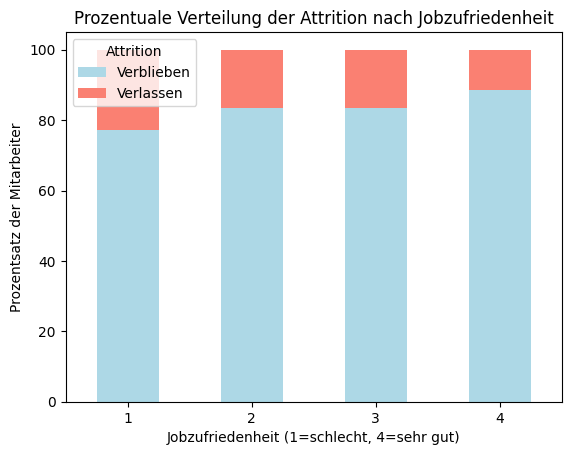

Es ist demnach zu schließen, dass sinnvoller Weise je höher die Zufriedenheit desto wahrscheinlicher der Verbleib im Unternehmen


In [14]:
# Berechne die Anzahl der Kündigungen und Verbliebenen pro Zufriedenheitsstufe
attrition_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().unstack(fill_value=0)

# Berechne die prozentuale Verteilung
attrition_percentage = attrition_counts.div(attrition_counts.sum(axis=1), axis=0) * 100

# Überprüfe die Ergebnisse
print(attrition_percentage)


# Erstelle das gestapelte Balkendiagramm
plt.figure(figsize=(10, 6))
attrition_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Prozentuale Verteilung der Attrition nach Jobzufriedenheit')
plt.xlabel('Jobzufriedenheit (1=schlecht, 4=sehr gut)')
plt.ylabel('Prozentsatz der Mitarbeiter')
plt.legend(title='Attrition', labels=['Verblieben', 'Verlassen'])
plt.xticks(rotation=0)
plt.show()

print('Es ist demnach zu schließen, dass sinnvoller Weise je höher die Zufriedenheit desto wahrscheinlicher der Verbleib im Unternehmen')

In [15]:
print(df.dtypes)

Age                            int64
Attrition                     object
BusinessTravel                object
DailyRate                      int64
Department                    object
DistanceFromHome               int64
Education                      int64
EducationField                object
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                        object
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                       object
JobSatisfaction                int64
MaritalStatus                 object
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                      object
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [16]:
# Mapping von Strings zu numerischen Werten
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})  # Attrition (1 für Ja, 0 für Nein)
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Frequently': 2, 'Travel_Rarely': 1, 'Non-Travel': 0})  # Reisemuster
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})  # Geschlecht
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})  # Überstunden
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})  # Abteilung
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})  # Familienstand
df['EducationField'] = df['EducationField'].astype('category').cat.codes  # Bildung (kategorisch in numerisch umwandeln)
df['JobRole'] = df['JobRole'].astype('category').cat.codes  # Jobrolle (kategorisch in numerisch umwandeln)

# Überprüfen, ob es weitere kategorische Variablen gibt
print(df.dtypes)

Age                            int64
Attrition                      int64
BusinessTravel                 int64
DailyRate                      int64
Department                     int64
DistanceFromHome               int64
Education                      int64
EducationField                  int8
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                         int64
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                         int8
JobSatisfaction                int64
MaritalStatus                  int64
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                       int64
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [17]:
# Überprüfen und Umwandeln von 'SalaryGroup' in numerische Werte
if df['SalaryGroup'].dtype == 'category':
    df['SalaryGroup'] = df['SalaryGroup'].cat.codes  # Umwandeln der Gehaltsgruppe in numerische Codes

# Überprüfen der 'Over18'-Spalte: Wenn sie nur 'Yes' oder 'No' enthält, dann umwandeln
if df['Over18'].nunique() == 2:
    df['Over18'] = df['Over18'].map({'Yes': 1, 'No': 0})  # 1 für Ja, 0 für Nein


In [18]:
print(df.dtypes)

Age                          int64
Attrition                    int64
BusinessTravel               int64
DailyRate                    int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField                int8
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                       int8
JobSatisfaction              int64
MaritalStatus                int64
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [19]:
# Überprüfen und Umwandeln von 'Over18' in numerische Werte
if df['Over18'].nunique() == 2 and all(value in ['Yes', 'No'] for value in df['Over18']):
    df['Over18'] = df['Over18'].map({'Yes': 1, 'No': 0})  # 1 für Ja, 0 für Nein
else:
    print("Die 'Over18'-Spalte enthält unerwartete Werte:", df['Over18'].unique())


Die 'Over18'-Spalte enthält unerwartete Werte: ['Y']


In [20]:
# Bereinigen der Werte in der 'Over18'-Spalte
df['Over18'] = df['Over18'].str.strip().str.capitalize()  # Leerzeichen entfernen und erste Buchstaben großschreiben

# Überprüfen der einzigartigen Werte erneut
print("Bereinigte Werte in 'Over18':", df['Over18'].unique())


Bereinigte Werte in 'Over18': ['Y']


In [21]:
# Einzigartige Werte in der 'Over18'-Spalte anzeigen
print("Einzigartige Werte in 'Over18':", df['Over18'].unique())

# Umwandeln der Werte in 'Over18' ohne FutureWarning
df['Over18'] = df['Over18'].replace({'Y': 1, 'N': 0})  # 'Y' zu 1 und 'N' zu 0

# Datentyp der 'Over18'-Spalte auf int setzen
df['Over18'] = df['Over18'].astype(int)

# Überprüfen des Datentyps von 'Over18'
print("Datentyp von 'Over18':", df['Over18'].dtype)


Einzigartige Werte in 'Over18': ['Y']
Datentyp von 'Over18': int64


C:\Users\YoussefAbbou\AppData\Local\Temp\ipykernel_21132\2304528038.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Over18'] = df['Over18'].replace({'Y': 1, 'N': 0})  # 'Y' zu 1 und 'N' zu 0


C:\Users\YoussefAbbou\AppData\Local\Temp\ipykernel_21132\3323616964.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=important_features.index, y=important_features.values, palette='coolwarm')


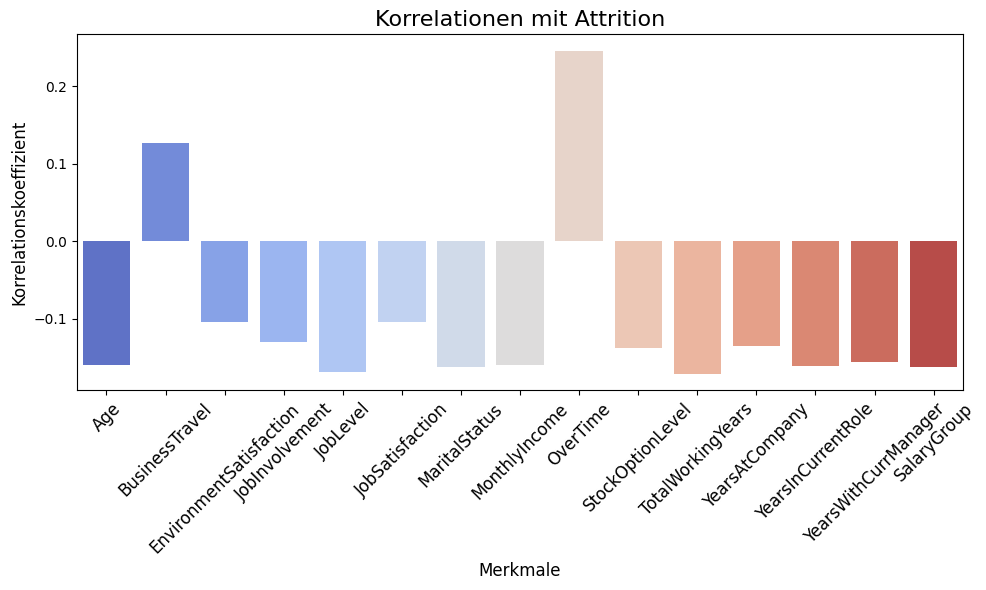

In [22]:
# Korrelation mit 'Attrition' berechnen
attrition_correlation = df.corr()['Attrition']

# Filtere die Merkmale mit einer absoluten Korrelation größer als 0.1
important_features = attrition_correlation[abs(attrition_correlation) > 0.1]

# Entferne 'Attrition' aus der Liste der Merkmale
important_features = important_features.drop('Attrition')

# Diagramm erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x=important_features.index, y=important_features.values, palette='coolwarm')
plt.title('Korrelationen mit Attrition', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.ylabel('Korrelationskoeffizient', fontsize=12)
plt.xlabel('Merkmale', fontsize=12)
plt.tight_layout()  # Passt die Layout an
plt.show()

In [23]:
# Zwischenerkenntnisse
influence_text = (
    "Zwischenerkenntnisse:\n"
    "Die wichtigsten Werte, die die Fluktuation (Attrition) beeinflussen, sind:\n"
    "1. MonthlyIncome: Höhere Einkommen sind mit einer höheren Kündigungswahrscheinlichkeit verbunden.\n"
    "2. JobSatisfaction: Höhere Zufriedenheit führt zu einer geringeren Wahrscheinlichkeit der Kündigung.\n"
    "3. OverTime: Mitarbeiter, die Überstunden leisten, haben eine höhere Wahrscheinlichkeit zu kündigen.\n"
    "4. YearsAtCompany: Längere Betriebszugehörigkeit verringert die Kündigungswahrscheinlichkeit.\n"
    "5. Age: Jüngere Mitarbeiter scheinen tendenziell eine höhere Fluktuation zu haben.\n"
    "Diese Merkmale zeigen signifikante Korrelationen mit der Mitarbeiterfluktuation."
)

# Text drucken
print(influence_text)


Zwischenerkenntnisse:
Die wichtigsten Werte, die die Fluktuation (Attrition) beeinflussen, sind:
1. MonthlyIncome: Höhere Einkommen sind mit einer höheren Kündigungswahrscheinlichkeit verbunden.
2. JobSatisfaction: Höhere Zufriedenheit führt zu einer geringeren Wahrscheinlichkeit der Kündigung.
3. OverTime: Mitarbeiter, die Überstunden leisten, haben eine höhere Wahrscheinlichkeit zu kündigen.
4. YearsAtCompany: Längere Betriebszugehörigkeit verringert die Kündigungswahrscheinlichkeit.
5. Age: Jüngere Mitarbeiter scheinen tendenziell eine höhere Fluktuation zu haben.
Diese Merkmale zeigen signifikante Korrelationen mit der Mitarbeiterfluktuation.


0-8 beschreiben die höhe der Position, wobei 0 die niedrigste und 8 die höchste Karrierestufe beschreibt
Es scheint, dass die Fluktuation am höchsten ist, beim "Abheben" der Karriere & kurz vor dem Zenit


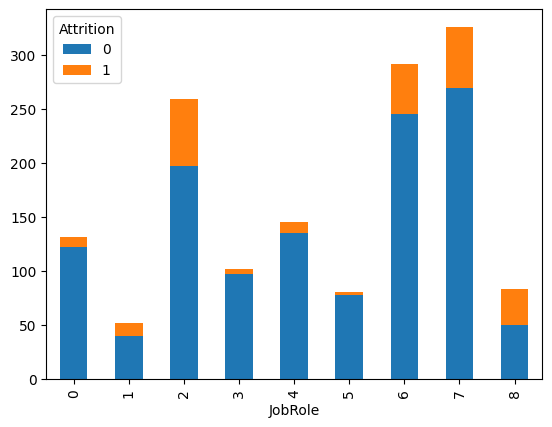

In [24]:
pd.crosstab(df['JobRole'], df['Attrition']).plot(kind='bar', stacked=True)

print('0-8 beschreiben die höhe der Position, wobei 0 die niedrigste und 8 die höchste Karrierestufe beschreibt')

print('Es scheint, dass die Fluktuation am höchsten ist, beim "Abheben" der Karriere & kurz vor dem Zenit')

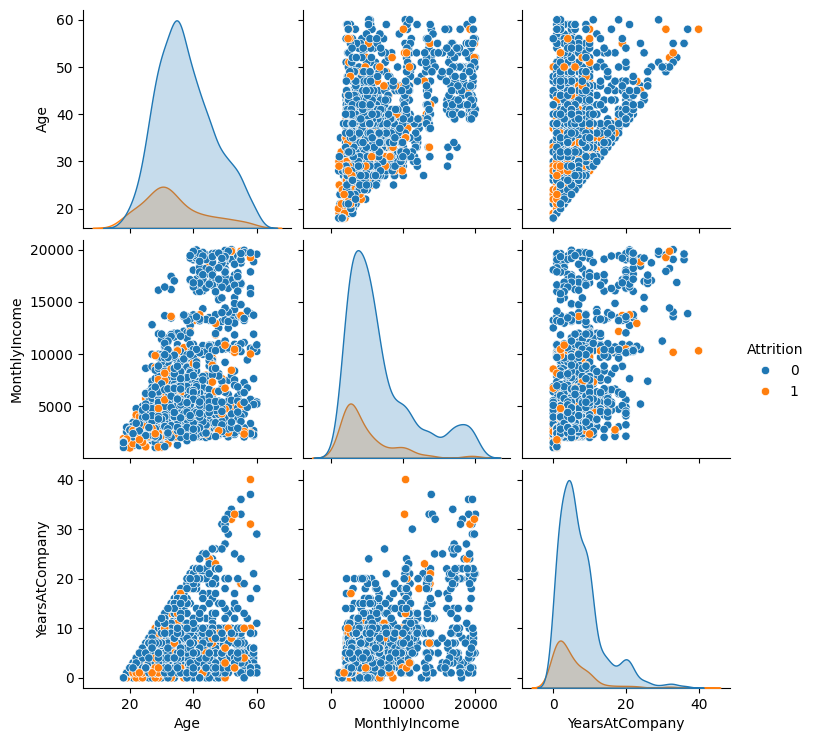

In [25]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']], hue='Attrition')

In [26]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [27]:
df[df == ''].count()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [28]:
df[df == -1].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [29]:
# Zeilen mit SalaryGroup = -1 anzeigen
missing_salary_group = df[df['SalaryGroup'] == -1]
print(missing_salary_group)


     Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
190   52          0               1        699           1                 1   

     Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
190          4               1              1             259  ...   

     StandardHours  StockOptionLevel  TotalWorkingYears  \
190             80                 1                 34   

     TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
190                      5                3              33   

     YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
190                  18                       11                     9   

     SalaryGroup  
190           -1  

[1 rows x 36 columns]


In [30]:
mode_salary_group = df['SalaryGroup'].mode()[0]  # Modus berechnen
df['SalaryGroup'] = df['SalaryGroup'].replace(-1, mode_salary_group)  # -1 durch Modus ersetzen


In [31]:
# Überprüfe erneut auf -1-Werte
print(df['SalaryGroup'].value_counts())


SalaryGroup
1    510
2    372
5    280
3    175
4    100
0     33
Name: count, dtype: int64


In [32]:
df[df == -1].count()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [33]:
# Notwendige Bibliotheken importieren
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Angenommen, df ist der bereinigte DataFrame, der bereits geladen und verarbeitet wurde

# Features und Zielvariable definieren
X = df.drop('Attrition', axis=1)  # Alle Spalten außer 'Attrition'
y = df['Attrition']  # Zielvariable

# Teile den Datensatz in Trainings- und Testdaten im Verhältnis 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Überprüfe die Verteilung der Klassen vor SMOTE
print("Verteilung der Klassen vor SMOTE:", Counter(y_train))

# Wende SMOTE an, um die Klassen auszugleichen
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Überprüfe die Verteilung der Klassen nach SMOTE
print("Verteilung der Klassen nach SMOTE:", Counter(y_resampled))

# Random Forest-Modell erstellen
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Vorhersagen für den Testdatensatz treffen
y_pred = model.predict(X_test)

# Konfusionsmatrix und Klassifikationsbericht ausgeben
print("Konfusionsmatrix:")
print(confusion_matrix(y_test, y_pred))
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred))


Verteilung der Klassen vor SMOTE: Counter({0: 863, 1: 166})
Verteilung der Klassen nach SMOTE: Counter({0: 863, 1: 863})
Konfusionsmatrix:
[[342  28]
 [ 49  22]]

Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       370
           1       0.44      0.31      0.36        71

    accuracy                           0.83       441
   macro avg       0.66      0.62      0.63       441
weighted avg       0.80      0.83      0.81       441



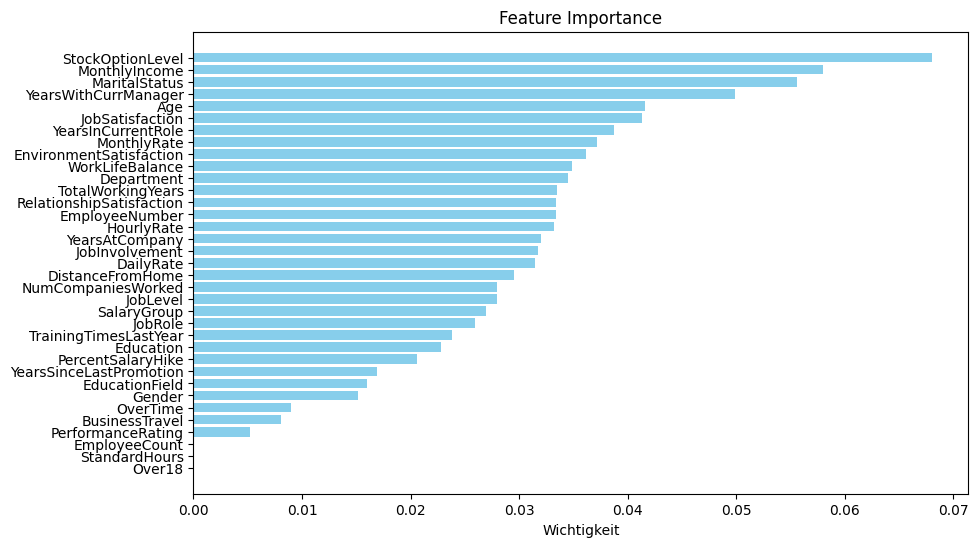

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, best_model ist das trainierte Random Forest-Modell
# und X_train sind die ursprünglichen Trainingsmerkmale

# Feature Importance abrufen
importances = best_model.feature_importances_

# Merkmale und ihre Wichtigkeit in ein DataFrame umwandeln
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sortiere nach Wichtigkeit
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisierung
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Wichtigkeit')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Umkehren der y-Achse, damit die wichtigste oben ist
plt.show()


In [ ]:
#Modellüberarbeitung und zukünftige Schritte

Das aktuelle Machine Learning Modell zeigt Verbesserungsbedarf, insbesondere bei der Vorhersage der Klasse 1. Die Leistung des Modells in Bezug auf diese Klasse ist nicht ganz zufriedenstellend, was auf die Notwendigkeit weiterer Optimierungen hinweist. In meinen zukünftigen Schritten werde ich verschiedene Ansätze in Betracht ziehen, um die Vorhersagegenauigkeit zu steigern, einschließlich:

    Hyperparameter-Optimierung: Anpassung der Modellparameter, um die Leistung zu verbessern.
    Erweiterte Datenanalyse: Durchführung zusätzlicher Analysen, um weitere relevante Merkmale zu identifizieren.
    Experimentieren mit anderen Modellen: Testen verschiedener Machine Learning Algorithmen, um zu sehen, ob ich bessere Ergebnisse erzielen kann.

Ich bin bestrebt, die Genauigkeit des Modells zu erhöhen und die Ursachen für die schwache Performance zu identifizieren. Die oben genannten Schritte werde ich in zukünftigen Iterationen des Projekts umsetzen.